# 实验目的

1. 熟悉Python标准库csv的用法
2. 熟悉CSV和TXT文件操作
3. 熟悉安装库numpy，pandas，matplolib
4. 熟悉使用扩展库pandas进行数据分析基本操作
5. 熟悉使用扩展库matplotlib进行数据可视化的基本操作

# 实验内容

(1)运行下面程序，在当前文件夹中生成饭店营业额模拟数据文件data.csv.

In [1]:
import csv
import random
import datetime

fn='data.csv'

with open(fn,'w') as fp:
    wr=csv.writer(fp,lineterminator='\n')
    wr.writerow(['日期','销量'])
    
    startDate=datetime.date(2017,1,1)

    for i in range(365):
        amount=300+i*5+random.randrange(100)
        wr.writerow([str(startDate),amount])
        startDate=startDate+datetime.timedelta(days=1)

(2) 然后完成下面任务。
1. 使用Pandas读取文件data.csv中的数据，创建DataFrame，并删除其中所有缺失值
2. 使用matplolib生成折线图，反应该饭店每天营业额情况，并把图形保存在本地文件first.jpg
3. 按月份进行统计，使用matplolib绘制柱状图显示每个月份的营业额，并把图形保存在本地文件secomd.jpg
4. 按月份进行统计，找出相邻两个月最大涨幅，并把涨幅最大的月份写入文件maxMonth.txt
5. 按季度统计该饭店2017年营业额数据，使用matplotlib生成饼状图形显示2017年4个季度营业额分布状况，并把图形保存在本地文件third.jpg

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

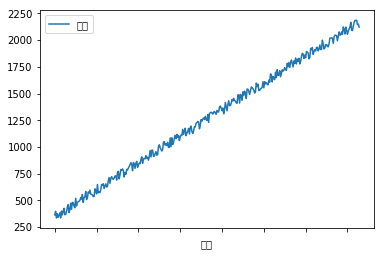

In [3]:
df=pd.read_csv('data.csv',encoding='cp936')
df=df.dropna()

plt.figure()
df.plot(x='日期')
plt.savefig('first.jpg')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 432x288 with 0 Axes>

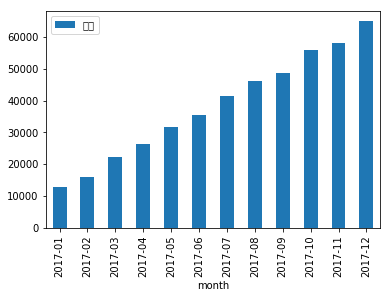

In [4]:
plt.figure()
df1=df[:]
df1['month']=df1['日期'].map(lambda x: x[:x.rindex('-')])
df1=df1.groupby(by='month',as_index=False).sum()
df1.plot(x='month',kind='bar')
plt.savefig('second.jpg')

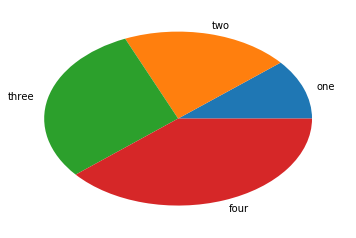

In [15]:
df2=df1.drop('month',axis=1).diff()
m=df2['销量'].nlargest(1).keys()[0]
with open('maxMonth.txt','w') as fp:
    fp.write(df1.loc[m,'month'])

plt.figure()
one=df1[:3]['销量'].sum()
two=df1[3:6]['销量'].sum()
three=df1[6:9]['销量'].sum()
four=df1[9:12]['销量'].sum()
plt.pie([one,two,three,four],
        labels=['one','two','three','four'])
plt.savefig('third.jpg')